In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
import cartopy.io.shapereader as shapereader

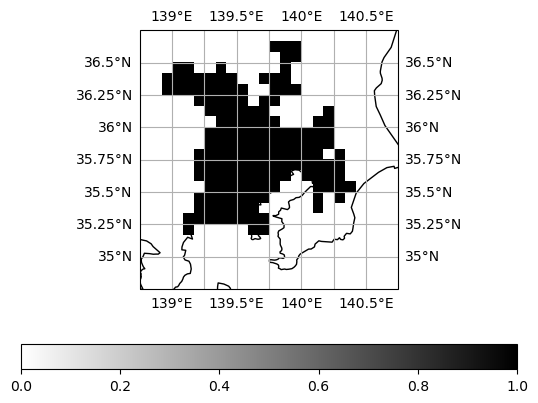

In [12]:
def get_coordinate(city_index):
    # width from center
    width = 1

    # length of figure
    length = 24
    
    # open city information text
    h08dir = '/home/kajiyama/H08/H08_20230612/map'
    city_path = f"{h08dir}/dat/cty_lst_/city_list03.txt"
    with open(city_path, "r") as file:
        all_lines = file.readlines()
    # get city
    line = all_lines[city_index - 1]
    line = line.strip()
    parts = line.split()
    
    loncnt = float(parts[2])
    latcnt = float(parts[3])
    
    lonmin = loncnt - width
    lonmax = loncnt + width
    latmin = latcnt - width
    latmax = latcnt + width

    # Dimension of the data
    a = 2160
    b = 4320

    ### Define the latitudes and longitudes
    # West from UK is negative 0 <= lon <= -180
    # East from UK is positive 0 <= lon <= 180
    # small value to larger value (34-36, 138-140)
    lat = np.linspace(-90, 90, a+1)
    lon = np.linspace(-180, 180, b+1)

    # calculate the indices correspondignt to the desired lat and lon
    lat_start, lat_end = np.searchsorted(lat, [latmin, latmax])
    lon_start, lon_end = np.searchsorted(lon, [lonmin, lonmax])

    ### adjust to 0.25 grid
    # lat
    if lat_start%3 == 0:
        lat_start = lat_start
    elif lat_start%3 == 1:
        lat_start -= 1
    elif lat_start%3 == 2:
        lat_start += 1

    # lon
    if lon_start%3 == 0:
        lon_start = lon_start
    elif lon_start%3 == 1:
        lon_start -= 1
    elif lon_start%3 == 2:
        lon_start += 1

    # 24 grid x 24 grid
    lat_end = lat_start + length
    lon_end = lon_start + length

    # convert real lonlat to h08 lonlat
    latmin_gl5 = lat[lat_start]
    latmax_gl5 = lat[lat_end]
    lonmin_gl5 = lon[lon_start]
    lonmax_gl5 = lon[lon_end]
    
    return lat_start, lat_end, lon_start, lon_end, latmin_gl5, latmax_gl5, lonmin_gl5, lonmax_gl5
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------

# city index
# [tokyo:1, losangels:12, paris: 20, london:29]
index = 1

h08dir = '/home/kajiyama/H08/H08_20230612/map'
mask_temp = np.fromfile(f'{h08dir}/dat/cty_msk_/city_{index:08d}.gl5', dtype='float32').reshape(2160, 4320)

# get city mask

# get city lonlat
lat_start, lat_end, lon_start, lon_end, latmin_gl5, latmax_gl5, lonmin_gl5, lonmax_gl5 = get_coordinate(index)

# crop
mask_flipped = np.flipud(mask_temp)
mask_cropped = mask_flipped[lat_start:lat_end, lon_start:lon_end]
cropped_flipped = np.flipud(mask_cropped)

# extent
projection = ccrs.PlateCarree()
img_extent = (lonmin_gl5, lonmax_gl5, latmin_gl5, latmax_gl5)

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.gridlines(draw_labels=True)
im = ax.imshow(cropped_flipped,
               origin='upper',
               extent=img_extent,
               transform=projection,
               cmap='gray_r')
fig.colorbar(im, ax=ax, orientation='horizontal')

624 672 3816 3852


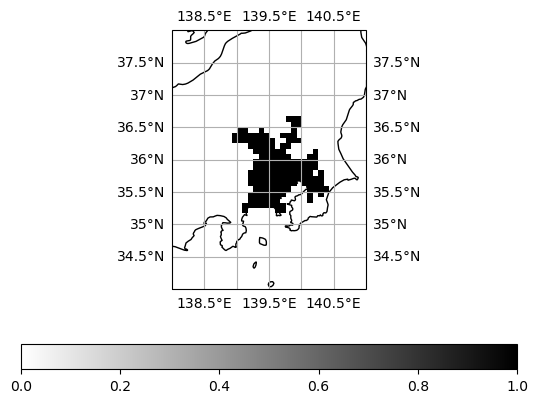

In [13]:
def geography():
    # Dimension of the data
    dtype = 'float32'
    SUF = '.gl5'
    ay, bx = 2160, 4320
    gl5shape = (ay, bx)
    #
    tag = '.tk5'
    nx, ny = 36, 48
    rgnshape = (ny, nx)
    city_num = 1
    #
    # region
    left = 138
    right = 141
    bottom = 34
    top = 38
    #
    resolution = 12
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    print(upperindex, lowerindex, leftindex, rightindex)
    #
    img_extent = (left, right, bottom, top)
    
    return city_num, upperindex, lowerindex, leftindex, rightindex, img_extent
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------
    
city_num, upperindex, lowerindex, leftindex, rightindex, img_extent = geography()
#
h08dir = '/home/kajiyama/H08/H08_20230612/map'
city_mask = np.fromfile(f'{h08dir}/dat/cty_msk_/city_{city_num:08d}.gl5', dtype='float32').reshape(2160, 4320)

# crop
mask_cropped = city_mask[upperindex:lowerindex, leftindex:rightindex]

# extent
projection = ccrs.PlateCarree()

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.add_feature(cfea.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=2)
ax.add_feature(cfea.LAKES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.gridlines(draw_labels=True)
im = ax.imshow(mask_cropped,
               origin='upper',
               extent=img_extent,
               transform=projection,
               cmap='gray_r')
fig.colorbar(im, ax=ax, orientation='horizontal')

624 672 3816 3852


/home/kajiyama/downloads/miniconda3/envs/jupyter39/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


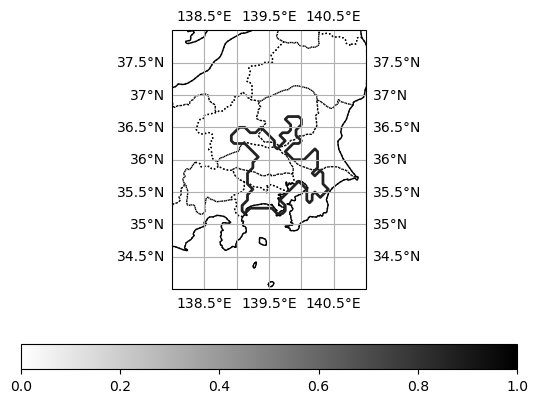

In [14]:
def geography():
    # Dimension of the data
    dtype = 'float32'
    SUF = '.gl5'
    ay, bx = 2160, 4320
    gl5shape = (ay, bx)
    #
    tag = '.tk5'
    nx, ny = 36, 48
    rgnshape = (ny, nx)
    city_num = 1
    #
    # region
    left = 138
    right = 141
    bottom = 34
    top = 38
    #
    resolution = 12
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    print(upperindex, lowerindex, leftindex, rightindex)
    #
    img_extent = (left, right, bottom, top)
    
    return city_num, upperindex, lowerindex, leftindex, rightindex, img_extent
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------
    
city_num, upperindex, lowerindex, leftindex, rightindex, img_extent = geography()
#
h08dir = '/home/kajiyama/H08/H08_20230612/map'
city_mask = np.fromfile(f'{h08dir}/dat/cty_msk_/city_{city_num:08d}.gl5', dtype='float32').reshape(2160, 4320)

# crop
mask_cropped = city_mask[upperindex:lowerindex, leftindex:rightindex]

# extent
projection = ccrs.PlateCarree()

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.add_feature(cfea.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=2)
ax.add_feature(cfea.LAKES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.gridlines(draw_labels=True)
ct = ax.contour(mask_cropped, levels=[0.5], colors='#222222', linewidths=2, origin='upper', extent=img_extent, transform=projection)
fig.colorbar(im, ax=ax, orientation='horizontal')

# tokyo shapefile
shpfilename = shapereader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
provinces = shapereader.Reader(shpfilename).records()
provinces_of_japan = filter(
    lambda province: province.attributes['admin'] == 'Japan', provinces)
for province in provinces_of_japan:
    geometry = province.geometry
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='none', linestyle=':', zorder=0)
ax.set_extent(img_extent)

624 672 3816 3852


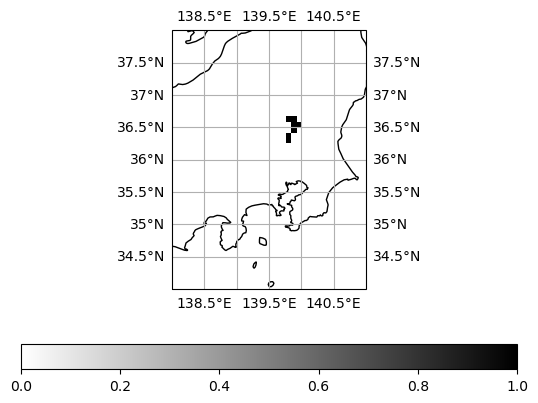

In [9]:
def geography():
    # Dimension of the data
    dtype = 'float32'
    SUF = '.gl5'
    ay, bx = 2160, 4320
    gl5shape = (ay, bx)
    #
    tag = '.ut5'
    nx, ny = 36, 48
    rgnshape = (ny, nx)
    #
    city_num = 789
    #
    # region
    left = 138
    right = 141
    bottom = 34
    top = 38
    #
    resolution = 12
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    print(upperindex, lowerindex, leftindex, rightindex)
    #
    img_extent = (left, right, bottom, top)
    
    return city_num, upperindex, lowerindex, leftindex, rightindex, img_extent
    
#-----------------------------------------------
# Draw city mask
#-----------------------------------------------
    
city_num, upperindex, lowerindex, leftindex, rightindex, img_extent = geography()
#
h08dir = '/home/kajiyama/H08/H08_20230612/map'
city_mask = np.fromfile(f'{h08dir}/dat/cty_msk_/city_{city_num:08d}.gl5', dtype='float32').reshape(2160, 4320)

# crop
mask_cropped = city_mask[upperindex:lowerindex, leftindex:rightindex]

# extent
projection = ccrs.PlateCarree()

# figure
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.add_feature(cfea.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=2)
ax.add_feature(cfea.LAKES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.gridlines(draw_labels=True)
im = ax.imshow(mask_cropped,
               origin='upper',
               extent=img_extent,
               transform=projection,
               cmap='gray_r')
fig.colorbar(im, ax=ax, orientation='horizontal')